In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import plot_confusion_matrix

df = pd.read_excel('datafred.xlsx', sheet_name= "DATACOMPLETA") 
df.head(5)

,Diagnostico,Genero,Edad,Escolaridad,IL_2,IL_6,IL_10,TNFa,SAP,CRP,...,T_ADLQ_I_Basic,T_ADLQ_I_Instrumental,T_ADLQ_I_Advanced,MiniSea_MiniSea_Total_FauxPas,MiniSea_MiniSea_Total_EkmanFaces,MiniSea_minisea_total,RCF_Time,RCF_Total_Score,TMT_A_Time,TMT_B_Time
0,0.0,M,78.0,12.0,0.000,0.245,5.29,14.05,4154.0,384.0,...,0.0,0.158730,0.750000,11.250,12.000,23.250,176.0,31.0,75.0,175.0
1,0.0,M,73.0,15.0,0.065,3.120,4.38,10.84,8826.0,8332.0,...,NaN,NaN,NaN,11.625,10.714,22.339,179.0,29.0,70.0,147.0
2,0.0,M,73.0,12.0,0.000,0.610,62.60,20.35,4700.0,19096.0,...,NaN,NaN,NaN,8.625,10.714,19.339,91.0,29.0,63.0,141.0
3,0.0,F,71.0,12.0,0.195,1.615,3.23,10.25,7558.0,21330.0,...,0.0,0.192982,0.333333,8.625,7.714,16.339,351.0,35.0,35.0,91.0
4,0.0,M,74.0,10.0,0.000,0.300,1.81,7.63,6508.0,436.0,...,0.0,0.092593,0.466667,12.000,12.429,24.429,125.0,32.0,72.0,128.0


In [14]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

print(rows_with_nan)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 20, 21, 24, 27, 42, 44, 51, 57, 61, 62, 63, 66, 82, 87, 88, 94, 98, 99, 100, 103, 110, 112, 117, 119, 120, 121, 123, 124, 128, 129, 130, 133, 134, 135, 141, 142, 143, 164, 169, 172, 177, 180, 183, 184, 186, 197, 198, 201, 203, 204, 205, 206, 207, 209, 210, 213, 214, 216, 217]


In [15]:
df= df.dropna()
len(df)

147

In [16]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Genero'] = labelencoder.fit_transform(df['Genero'])
df['ApoE_genotipo'] = labelencoder.fit_transform(df['ApoE_genotipo'])
df['ApoE2masmenos'] = labelencoder.fit_transform(df['ApoE2masmenos'])
df['ApoE4masmenos'] = labelencoder.fit_transform(df['ApoE4masmenos'])
df['MAPT_genotipo'] = labelencoder.fit_transform(df['MAPT_genotipo'])
df.head(5)
#MALE = 1, FEMALE = 0

,Diagnostico,Genero,Edad,Escolaridad,IL_2,IL_6,IL_10,TNFa,SAP,CRP,...,T_ADLQ_I_Basic,T_ADLQ_I_Instrumental,T_ADLQ_I_Advanced,MiniSea_MiniSea_Total_FauxPas,MiniSea_MiniSea_Total_EkmanFaces,MiniSea_minisea_total,RCF_Time,RCF_Total_Score,TMT_A_Time,TMT_B_Time
0,0.0,1,78.0,12.0,0.00000,0.24500,5.2900,14.0500,4154.0,384.0,...,0.0,0.158730,0.750000,11.250,12.000,23.250,176.0,31.0,75.0,175.0
11,0.0,1,76.0,3.0,0.22455,0.00000,2.4318,3.6735,7742.0,1874.0,...,0.0,0.174603,0.333333,7.875,12.000,19.875,332.0,34.0,142.0,155.0
13,0.0,0,72.0,8.0,0.65110,0.00175,63.5570,8.2975,6024.0,16338.0,...,0.0,0.017544,0.000000,12.000,10.714,22.714,177.0,31.0,73.0,184.0
15,0.0,0,75.0,12.0,0.09315,1.78310,2.7463,10.2875,8774.0,45218.0,...,0.0,0.174603,0.416667,10.875,10.286,21.161,223.0,15.5,100.0,300.0
16,0.0,0,76.0,17.0,0.27530,0.00000,1.5492,7.4602,7092.0,2380.0,...,0.0,0.079365,0.200000,14.625,13.286,27.911,357.0,18.5,67.0,93.0


In [17]:
#Separación de la data
df_data = df.drop(['Diagnostico'],axis = 1)
df_target = df['Diagnostico']
X, y = df_data, df_target

3. Train/Test split

In [25]:
from sklearn.preprocessing import MinMaxScaler  
# Train/test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1121218
)


In [26]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 20)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

Elbow method to calculate K value graphically: 
To set the optimum value of K here, I have used the elbow method; the plot below shows the error rate against 100 values of K. Error rate is calculated by taking the mean of where the predicted value is not equal to the actual value.

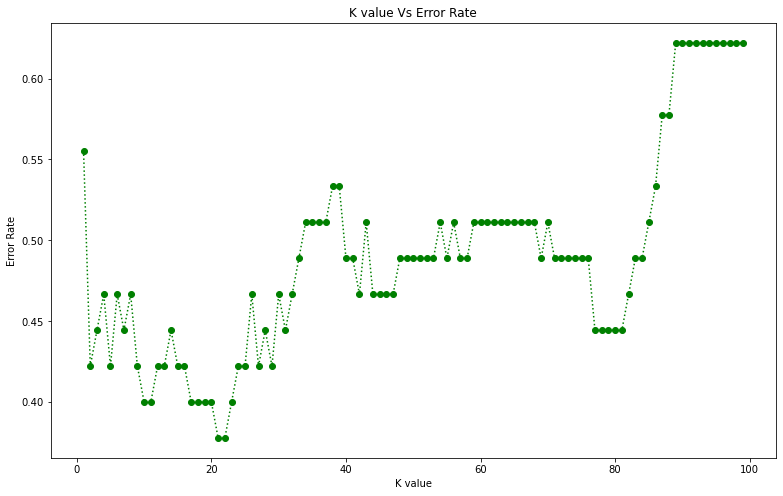

In [28]:
error_rate=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(13,8))
plt.plot(range(1,100), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('K value Vs Error Rate')
plt.show() 

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.55      0.80      0.65        15
         2.0       0.65      0.76      0.70        17
         3.0       1.00      0.60      0.75         5

    accuracy                           0.62        45
   macro avg       0.55      0.54      0.53        45
weighted avg       0.54      0.62      0.57        45



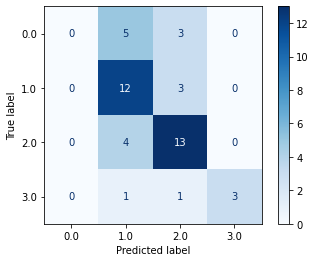

In [29]:
from sklearn.metrics import classification_report
model = KNeighborsClassifier(n_neighbors= 21 ).fit(x_train,y_train)
pred = model.predict(x_test)
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))

Decision Tree

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.40      0.25      0.31         8
         1.0       0.53      0.60      0.56        15
         2.0       0.56      0.53      0.55        17
         3.0       0.57      0.80      0.67         5

    accuracy                           0.53        45
   macro avg       0.52      0.54      0.52        45
weighted avg       0.52      0.53      0.52        45



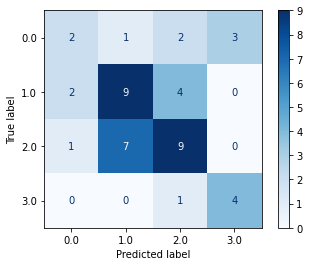

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

pred = dt.predict(x_test)
plot_confusion_matrix(dt,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.25      0.12      0.17         8
         1.0       0.50      0.60      0.55        15
         2.0       0.60      0.53      0.56        17
         3.0       0.50      0.80      0.62         5

    accuracy                           0.51        45
   macro avg       0.46      0.51      0.47        45
weighted avg       0.49      0.51      0.49        45



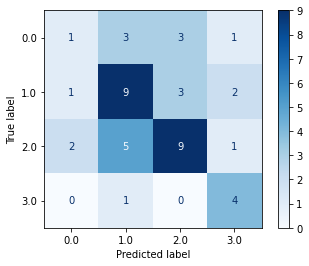

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

pred = gnb.predict(x_test)
plot_confusion_matrix(gnb,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))